#### Import libraries and load data

In [50]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [51]:
# Load Data
data = pd.read_csv("processed_data.txt", sep="|")
data.head()

,Gender,Age_Scaled,Salary_Transformed_Scaled,Purchased
0,1,-1.781797,-1.809254,0
1,1,-0.253587,-1.752550,0
2,0,-1.113206,-0.725701,0
3,0,-1.017692,-0.246493,0
4,1,-1.781797,0.311281,0


#### Define model features and inputs

In [53]:
# Define features
X = data[["Gender", "Age_Scaled", "Salary_Transformed_Scaled"]]

In [54]:
# Define target
y = data["Purchased"]

#### Divide data into testing and training sets

In [56]:
# Divide data into training and testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=25)

In [57]:
# Convert train and test data sets into tensors
import tensorflow as tf
tf.random.set_seed(15)

#### Define model and parameters

In [59]:
# Define model and layers
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(3,)), 
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [60]:
# Define model attributes
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), 
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 32)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 161 (644.00 B)

 Trainable params: 161 (644.00 B)

 Non-trainable params: 0 (0.00 B)

#### Train and evaluate model

In [62]:
# Train model
history = model.fit(X_train, y_train, batch_size=5, epochs=10, verbose=1, validation_data=(X_test, y_test))
history

Epoch 1/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4702 - loss: 0.7180 - val_accuracy: 0.7667 - val_loss: 0.6198
Epoch 2/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7632 - loss: 0.6015 - val_accuracy: 0.8000 - val_loss: 0.5333
Epoch 3/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8051 - loss: 0.5216 - val_accuracy: 0.8167 - val_loss: 0.4717
Epoch 4/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8292 - loss: 0.4639 - val_accuracy: 0.8333 - val_loss: 0.4259
Epoch 5/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8462 - loss: 0.4228 - val_accuracy: 0.8333 - val_loss: 0.3919
Epoch 6/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8468 - loss: 0.3930 - val_accuracy: 0.8333 - val_loss: 0.3664
Epoch 7/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8418 - loss: 0.3707 - val_accuracy: 0.8333 - val_loss: 0.3466
Epoch 8/10
68/68 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8468 - loss: 0.3532 - val_accuracy: 0.8333 - val_loss:

In [63]:
# Evaluate model
results = model.evaluate(X_test, y_test, batch_size=5)
print("Model testing accuracy is", round(results[1], 3), "\nModel testing loss is", round(results[0], 3))

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9304 - loss: 0.2742 
Model testing accuracy is 0.883 
Model testing loss is 0.306


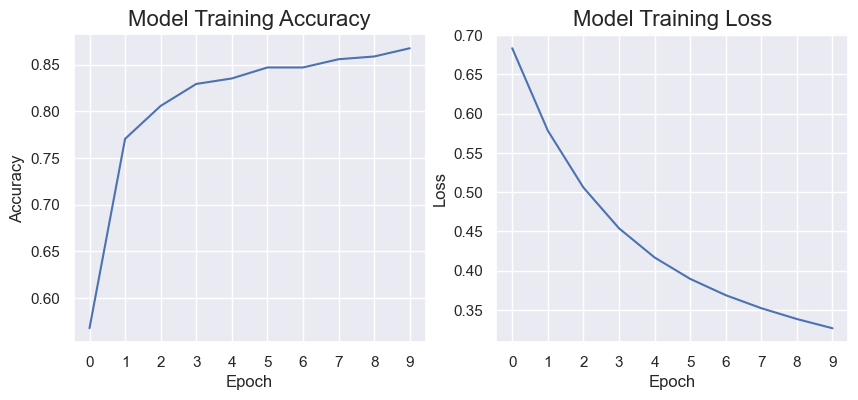

In [64]:
# Plot accuracy and loss
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
ax1.plot(history.history["accuracy"])
ax1.set_xlabel("Epoch")
ax1.set_ylabel("Accuracy")
ax1.set_xticks(np.arange(0,10,1))
ax1.set_title("Model Training Accuracy", fontsize=16)

ax2.plot(history.history["loss"])
ax2.set_xlabel("Epoch")
ax2.set_ylabel("Loss")
ax2.set_xticks(np.arange(0,10,1))
ax2.set_title("Model Training Loss", fontsize=16)
plt.show()

In [65]:
# Predictions from testing data
y_pred = model.predict(X_test)

# Set theshold
threshold = 0.60
y_pred_with_threshold = np.where(y_pred > threshold, 1, 0)

# Generate confusion matrix
tf.math.confusion_matrix(y_test, y_pred_with_threshold)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[34,  4],
       [ 7, 15]])>

#### Model coefficients

In [67]:
# Use statsmodels to get p-values
import statsmodels.api as sm
ols_model = sm.OLS(y_train, X_train)
results = ols_model.fit()

In [68]:
# Coefficients and p-values
details = pd.DataFrame()
details["Coefficients"] = results.params
details["p-values"] = results.pvalues.round(10)
details

,Coefficients,p-values
Gender,0.375529,0.000000e+00
Age_Scaled,0.284891,0.000000e+00
Salary_Transformed_Scaled,0.122238,4.210000e-07


#### Generate predictions based on new data

In [70]:
# Import scaler object from "Preprocessing" notebook
%store -r scaler

In [71]:
# Function to make predictions from a set of input tensors
def predict_with_new_data(input):
    scaled_input = scaler.fit_transform(input)
    scaled_input_tensor = tf.convert_to_tensor(scaled_input, dtype=tf.float32)
    prediction = model.predict(tf.stack(scaled_input_tensor))
    return tf.round(prediction * 1000.0) / 1000.0

In [72]:
# Generate new, random data to test model
random_new_data = []

for i in np.arange(1,11):
    gender_random = np.random.choice([0, 1]) # Gender
    age_random = int(np.random.uniform(18, 65)) # Age
    salary_transformed_random = int(np.random.uniform(180, 400)) # Salary
    test_user_data = [gender_random, age_random, salary_transformed_random]
    random_new_data.append(test_user_data)

random_new_data

[[0, 62, 294],
 [1, 59, 219],
 [0, 29, 229],
 [0, 39, 377],
 [1, 50, 388],
 [1, 26, 388],
 [1, 51, 366],
 [0, 29, 391],
 [0, 55, 217],
 [1, 39, 295]]

In [73]:
# Run prediction on randomized new data
new_predictions = predict_with_new_data(random_new_data)
new_predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[0.78 ],
       [0.717],
       [0.054],
       [0.522],
       [0.697],
       [0.088],
       [0.646],
       [0.349],
       [0.61 ],
       [0.067]], dtype=float32)>